# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment3 using this file format:</u> <b>Yourfirstname_lastname_Assignment3.ipynb</b> 

#### <b>Deadline</b>: <u>Friday, Oct-19-2018 11:59 PM.</u>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets,svm,tree,preprocessing,metrics
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,cross_val_predict,cross_val_score

# Assignment 3 -- Part 1

In this part, you will use SVM from sklearn to classify non-linearly sperable datasets. 

Hint: Refer to the example in sklearn http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, you can use this code or part of it in your solutions.

Load (using load_breast_cancer) datasets from sklearn (datasets.load_breast_cancer()):



In [2]:
cancerData = datasets.load_breast_cancer()
x=cancerData.data
x = preprocessing.scale(x)
y=cancerData.target

a. [25 pts]

1. In this question, you need to find the best SVM kernel that fit the data. Use scikit learn Library built-in SVM functions, evaluate 'linear', 'poly', 'rbf', 'sigmoid' Kernels using the default parameters as they aren't biased towards one of the kernels. Remember that in order to evaluate kernels or any hyper param you need to use cross-validation method. use k=50 for this question. Comment on the results.

2. Which scoring metric you would like to use? justify your answer.

Note: You can use built-in scikit learn function for this question and all other questions in this assignment else it is mentioned not to use it.

In [3]:
linearModel = svm.SVC(kernel='linear')
rbfModel = svm.SVC(kernel='rbf')
polyModel = svm.SVC(kernel='poly')
sigmoidModel = svm.SVC(kernel='sigmoid')
linearModel = linearModel.fit(x, y)
rbfModel = rbfModel.fit(x, y)
polyModel = polyModel.fit(x, y)
sigmoidModel = sigmoidModel.fit(x, y)

y_pred = cross_val_predict(polyModel,x, y, cv=50)
print("Using Poly kernels:")
print(metrics.classification_report(y, y_pred))
#print(metrics.confusion_matrix(y, y_pred))

y_pred = cross_val_predict(sigmoidModel,x, y, cv=50)
print("Using Sigmoid kernels:")
print(metrics.classification_report(y, y_pred))
#print(metrics.confusion_matrix(y, y_pred))

y_pred = cross_val_predict(linearModel,x, y, cv=50)
print("Using Linear kernels:")
print(metrics.classification_report(y, y_pred))
#print(metrics.confusion_matrix(y, y_pred))

y_pred = cross_val_predict(rbfModel,x, y, cv=50)
print("Using RBF kernels:")
print(metrics.classification_report(y, y_pred))
#print(metrics.confusion_matrix(y, y_pred))

# I would use rbf because it gives us the highest f1-score

Using Poly kernels:
             precision    recall  f1-score   support

          0       1.00      0.75      0.86       212
          1       0.87      1.00      0.93       357

avg / total       0.92      0.91      0.90       569

Using Sigmoid kernels:
             precision    recall  f1-score   support

          0       0.97      0.92      0.95       212
          1       0.95      0.99      0.97       357

avg / total       0.96      0.96      0.96       569

Using Linear kernels:
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       212
          1       0.97      0.98      0.98       357

avg / total       0.97      0.97      0.97       569

Using RBF kernels:
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       212
          1       0.98      0.99      0.98       357

avg / total       0.98      0.98      0.98       569



b. [25 pts]

Using random search, what are the optimum hyperparameters for each kernel? 
For this question use, only a few numbers of iterations when you do a random search (no need to run for long hours) also be smart when you select the scale for the C, gamma and class_weight thus you can find the best params. Which SVM kernel achieving the highest performance?

Note: You can use RandomizedSearchCV function from the scikit learn library.

In [8]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
model = SVC()

# run randomized search
random_search1 = RandomizedSearchCV(model, param_distributions={"gamma": gamma_range,"C": C_range,'kernel':['poly']},n_iter=20)
random_search1.fit(x, y)
random_search2 = RandomizedSearchCV(model, param_distributions={"gamma": gamma_range,"C": C_range,'kernel':['sigmoid']},n_iter=20)
random_search2.fit(x, y)
random_search3 = RandomizedSearchCV(model, param_distributions={"gamma": gamma_range,"C": C_range,'kernel':['linear']},n_iter=20)
random_search3.fit(x, y)
random_search4 = RandomizedSearchCV(model, param_distributions={"gamma": gamma_range,"C": C_range,'kernel':['rbf']},n_iter=20)
random_search4.fit(x, y)

# summarize the results of the random search
print("Poly best params: \t",random_search1.best_score_,'\t',random_search1.best_estimator_.gamma,'\t',random_search1.best_estimator_.C)
print("Sigmoid best params: \t",random_search2.best_score_,'\t',random_search2.best_estimator_.gamma,'\t',random_search2.best_estimator_.C)
print("Linear best params: \t",random_search3.best_score_,'\t',random_search3.best_estimator_.gamma,'\t',random_search3.best_estimator_.C)
print("RBF best params: \t",random_search4.best_score_,'\t',random_search4.best_estimator_.gamma,'\t',random_search4.best_estimator_.C)

#Linear kernel is achieving the highest performance

Poly best params: 	 0.945518453427065 	 0.0001 	 10000000000.0
Sigmoid best params: 	 0.9666080843585237 	 1e-05 	 1000.0
Linear best params: 	 0.9736379613356766 	 100.0 	 0.1
RBF best params: 	 0.9666080843585237 	 1e-05 	 100000.0


c. (Graduate students only) [20 pts]

Randomly select 20% of the data for testing and the rest for training.

Plot the decision surface for "worse SVM", "best SVM" found in part b and report the performance for each, you may use built-in sklean functions for visualization.

Note: For visualization you need to work on two-dimensional feature space, to do so use PCA to reduce the number of the feature to 2 features. 

# Assignment 3 -- Part 2

In this part, you will use the decision tree from sklearn to classify non-linearly separable datasets. 


Load Car Evaluation Data Set from https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data, read the dataset description and get familiar with the dataset attributes https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

This dataset includes strings, you might need to convert them to numbers, in this case, you might need to use methods such as preprocessing.LabelEncoder() 


a. [20 pts]

Use the decision tree to classify the dataset (evaluate cars to one of the four classes unacc, acc, good, v-good), use cross-validation to report your results, you can use sklearn.tree.DecisionTreeClassifier.


In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
data = np.matrix(pd.read_csv(url))
x = np.matrix(data[:,0:6])
y = np.matrix(data[:,-1])

le = preprocessing.LabelEncoder()
le.fit(x[:,0])
x[:,0]=le.transform(x[:,0]).reshape(1727,1)
le.fit(x[:,1])
x[:,1]=le.transform(x[:,1]).reshape(1727,1)
le.fit(x[:,2])
x[:,2]=le.transform(x[:,2]).reshape(1727,1)
le.fit(x[:,3])
x[:,3]=le.transform(x[:,3]).reshape(1727,1)
le.fit(x[:,4])
x[:,4]=le.transform(x[:,4]).reshape(1727,1)
le.fit(x[:,5])
x[:,5]=le.transform(x[:,5]).reshape(1727,1)
le.fit(y)
y=le.transform(y).reshape(1727,1)

decisionTree = tree.DecisionTreeClassifier()
score=cross_val_score(decisionTree, x, y, cv=50)
print(score)
np.mean(score)

[0.97297297 0.94594595 1.         0.97297297 0.97297297 1.
 1.         1.         1.         1.         0.97222222 0.97222222
 1.         0.91666667 0.94444444 1.         0.97142857 1.
 1.         0.97058824 0.97058824 1.         1.         1.
 1.         1.         1.         0.94117647 0.94117647 0.94117647
 1.         0.94117647 0.94117647 1.         0.96969697 1.
 0.87878788 1.         1.         1.         0.96969697 1.
 0.96969697 0.93939394 0.96969697 1.         1.         1.
 1.         1.        ]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9797175502469619

b. [20 pts]

What is the optimum min_samples_split (The minimum number of samples required to split an internal node), does it make sense? Why?




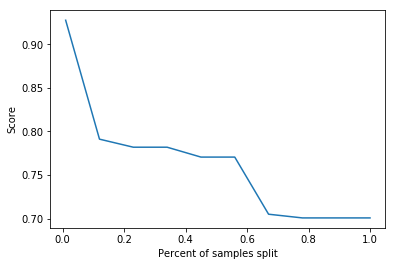

In [47]:
min_samp = np.linspace(0.01,1,10)
results=[]

for samp in min_samp:
    decisionTree = tree.DecisionTreeClassifier(min_samples_split=samp)
    score=np.mean(cross_val_score(decisionTree, x, y, cv=50))
    results.append(score)

plt.plot(min_samp,results,'-')
plt.xlabel("Percent of samples split")
plt.ylabel("Score")
plt.show()

# The optimim min_samples_split would be 2 as this model does not show signs of overfitting.

c. (Graduate students only) [25 pts]

Implement random forest classifier by defining multiple (DecisionTreeClassifier)'s from sklearn, you can use the max_features from DecisionTreeClassifier, compare your results to RandomForestClassifier from sklearn.

Note: In this part implement the bagging/ensemble by yourself without calling built-in functions from sklearn (you may still use RandomForestClassifier from sklearn with max_features).
